## Question 2:

In this question they ask to create a list of wines from different part of the world and identify areas similar for production to select best wine from such areas.

The question is not completely clear, there is no clear indication what do they mean by area and production in the question 

### Assumption:
 - I am gussing area means `country` or `province` in this context 
 - I am gussing production means `variety` in this context 

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS

For this question we are going to used the processed data which I created for question 1. 

In [2]:
df=pd.read_csv('dataprocessed.csv')
print(df.shape)

(120915, 10)


To better understand `price` and `points` for each country I am going to plot the mean `price` and `point` for each country. So I have grouped the dataframe by `country` and calculated mean

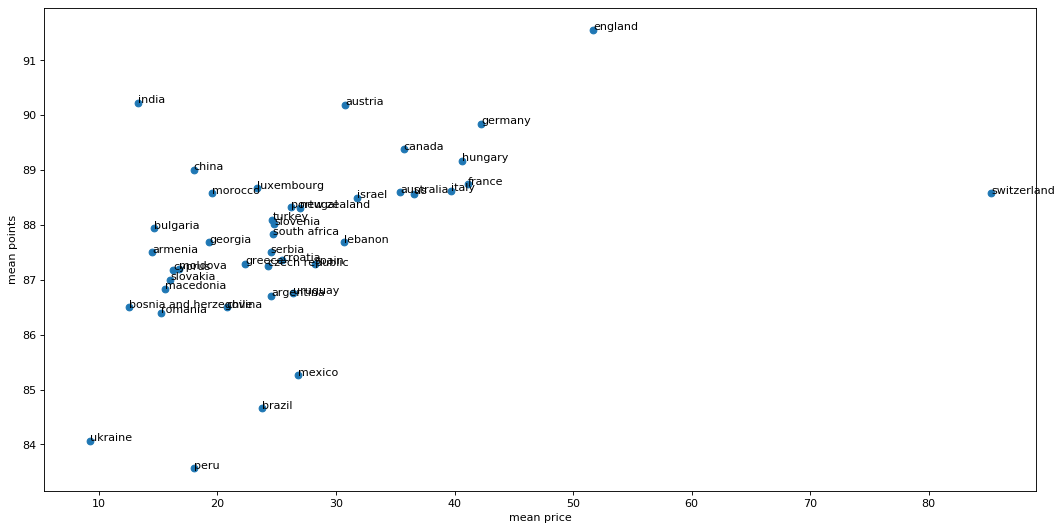

In [4]:
df_countries=df[['country','price','points']]
grb_countries=df_countries.groupby('country')['price','points'].mean().reset_index()

plt.figure(figsize=(16,8), dpi=80)
plt.scatter(grb_countries['price'], grb_countries['points'])
plt.xlabel('mean price')
plt.ylabel('mean points')
for i, txt in enumerate(grb_countries['country']):
    plt.annotate(txt, (grb_countries['price'][i], grb_countries['points'][i]))

From the plot you can see that switzerland has very high price compared to same quality wines in other countries. This gives a better idea about the price and points of wines coming from each country 

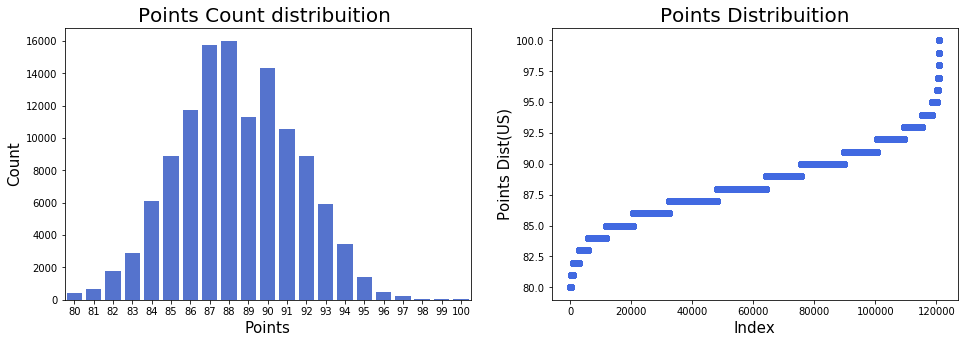

In [85]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
g = sns.countplot(x='points', data=df, color='royalblue') 
g.set_title("Points Count distribuition ", fontsize=20)
g.set_xlabel("Points", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(1,2,2)  
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='royalblue') 
plt.xlabel('Index', fontsize=15)
plt.ylabel('Points Dist(US)', fontsize=15) 
plt.title("Points Distribuition", fontsize=20)

plt.show() 

We can clearly see the distribuitioon of the data. It seems very similar with a normal distribution. Just a few number of wines have less than 82 points and more than 95 points. As Points are one of the most important metrics in this dataset, I will explore it furthuer more.

Let's set the points into categories. I will create a new feature containing the range of the points with a rank.

In [49]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df["rating_cat"] = df["points"].apply(cat_points)

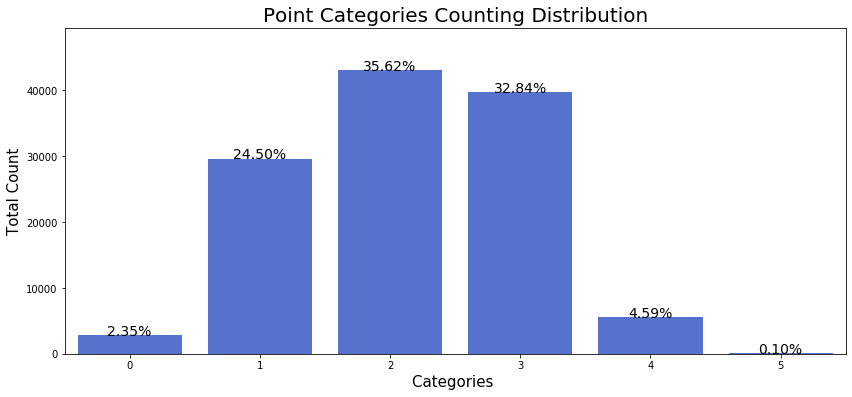

In [86]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='royalblue',
                  data=df)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

Plot shows distribution of `points`after the transformation. 

## Price distribution

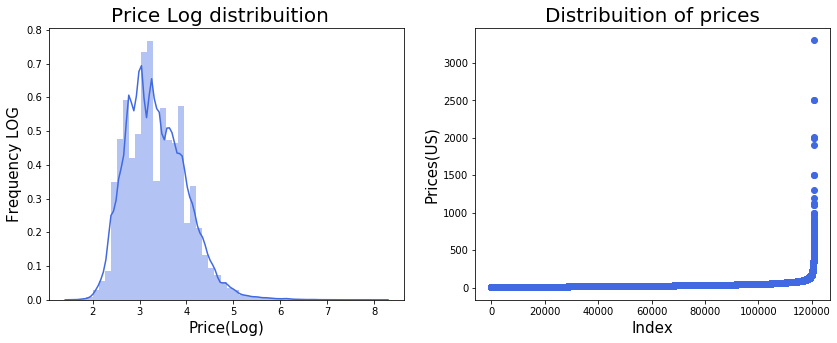

In [87]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='royalblue')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='royalblue')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

The Price Log give us an impression that the data could normaly distributed, but like in points, we need to test.

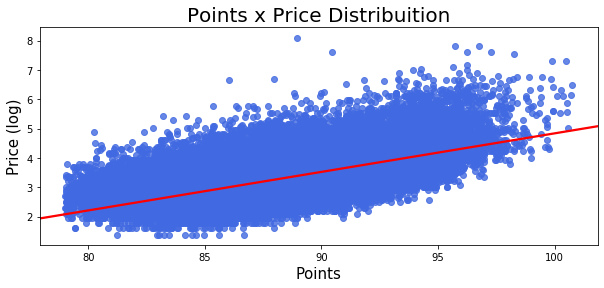

In [88]:
df['price_log'] = np.log(df['price'])
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='royalblue')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

Very meaningful scatter plot.
 - The highest prices isn't of the wine with highest point.
 - The most expensive wine have ponctuation between 87 and 90

## Country Feature 

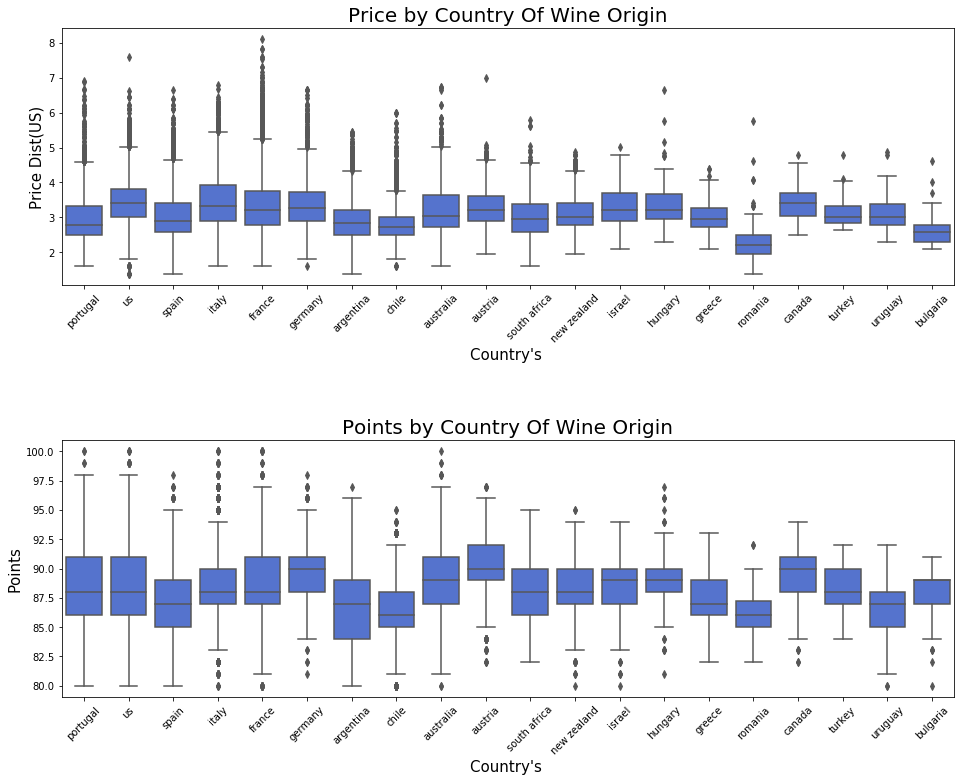

In [89]:
country = df.country.value_counts()[:20]
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(country.index.values))],
                 color='royalblue')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(country.index.values)],
                 color='royalblue')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

The plot shows distribution of 20 countries by price and rating

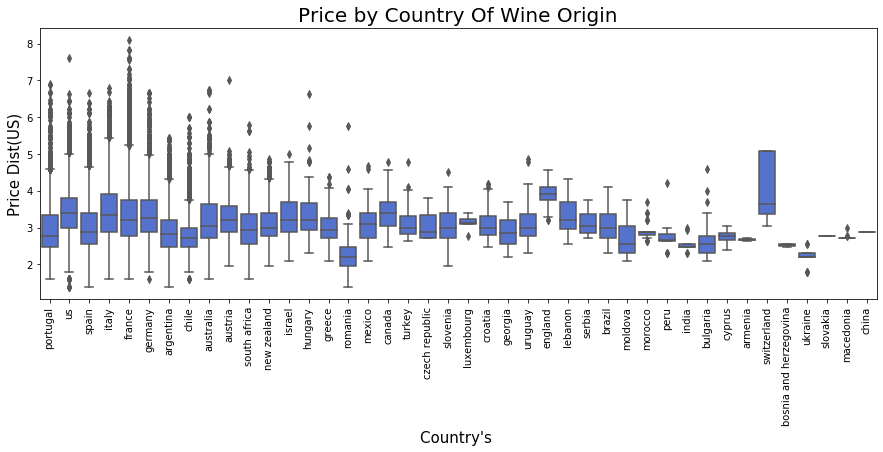

In [90]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='royalblue',
                  data=df)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

Plot shows price lower than 500. It shows all wines has quality in a value lower than 100

## Variety Feature 

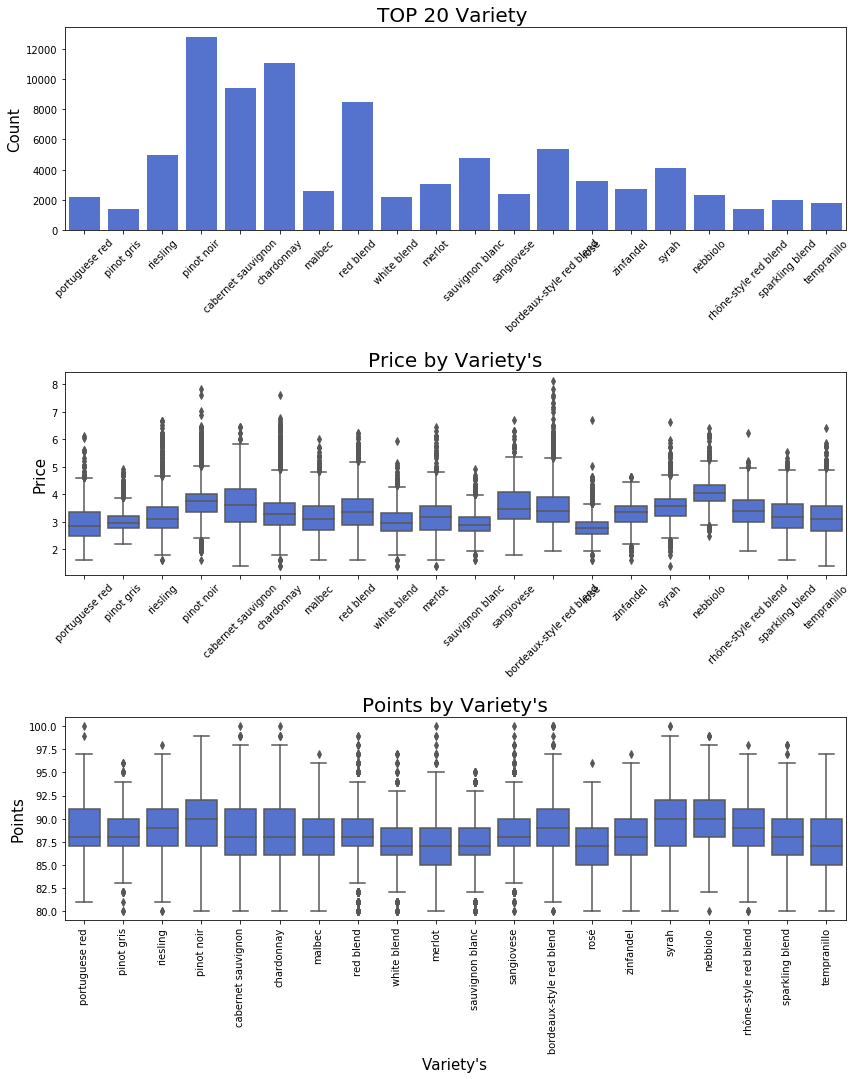

In [91]:
plt.figure(figsize=(14,16))

variety = df.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                  color='royalblue')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='royalblue')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='royalblue')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

First plot shows top 20 `variety` then second plot shows `price` and `variety` relation. The last plot shows `points` and `variety` relation

## Create list of wines from different parts of the world 

In [9]:
grb_country=df.groupby('country')

I have grouped the data by country. That created 42 groups. So I will group each country data by province then each province by variety then finally choosed the best wine from each variety by points.

In [76]:
d=pd.DataFrame()
for name,group in grb_country:
    grb_province=group.groupby('province')
    for n,gb in grb_province:
        g=gb.groupby('variety')
        for nn,gv in g:
            l=gv.sort_values('points')
            d=d.append(l.iloc[0])
                

In [45]:
d=d.reset_index()
d=d.drop('index',axis=1)
d.head(5)

,country,description,designation,points,price,province,taster_name,title,variety,winery
0,argentina,"murky and dark in appearance, this older bonar...",unknown,80.0,14.0,mendoza province,michael schachner,hollen family vineyards 2008 bonarda (mendoza),bonarda,hollen family vineyards
1,argentina,the quality of casarena's wines range from exc...,reserva sinergy,81.0,25.0,mendoza province,michael schachner,casarena 2010 reserva sinergy red (mendoza),bordeaux-style red blend,casarena
2,argentina,"bland and chunky, with aromas of talcum powder...",carrascal,83.0,14.0,mendoza province,michael schachner,weinert 2009 carrascal white (mendoza),bordeaux-style white blend,weinert
3,argentina,"edgy from the start, this blend of cabernet, m...",terroir series cabernet sauvignon malbec petit...,85.0,17.0,mendoza province,michael schachner,kaiken 2014 terroir series cabernet sauvignon ...,cabernet blend,kaiken
4,argentina,"smells volatile and balsamic, much like salad ...",gran,83.0,40.0,mendoza province,michael schachner,pulenta estate 2008 gran cabernet franc (luján...,cabernet franc,pulenta estate


It create a list of 4012 best wines from different areas of the world. The above table shows first 5 entries of the list.

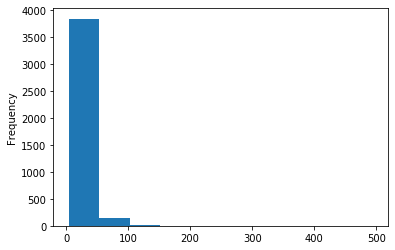

In [43]:
d.price.plot.hist()

The above plot shows the price distribution in my list of wines. let see it in more details

In [44]:
d.describe()

,points,price
count,4012.000000,4012.000000
mean,85.611167,23.095464
std,3.000267,19.580240
min,80.000000,4.000000
25%,84.000000,13.000000
50%,85.000000,18.500000
75%,88.000000,26.250000
max,96.000000,495.000000


The above table gives better idea about out list. In the question they mentioned that customer can be different types and interested in different price range. Wines in the list has broad price range starting from 4 to 495. 

In [92]:
d.to_csv('list_of_wines')

I have saved the list as csv file

## Let's analyze the description and title 

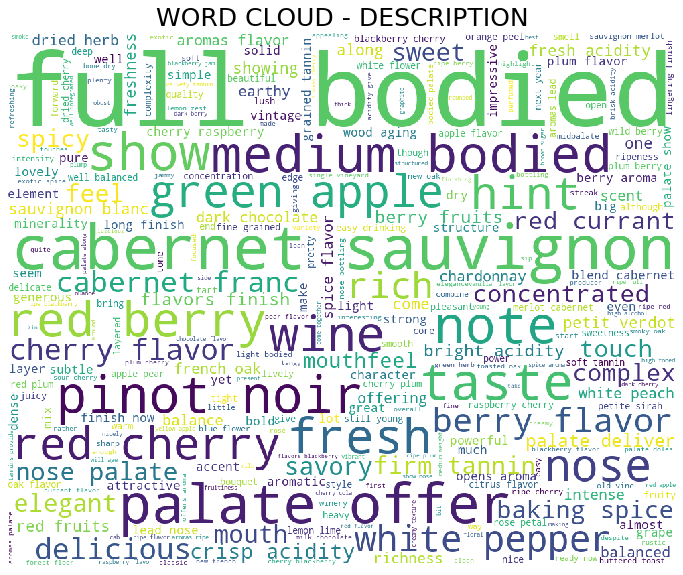

In [67]:
stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

This word cloud shows the most frequent keywords in the description of the wines 

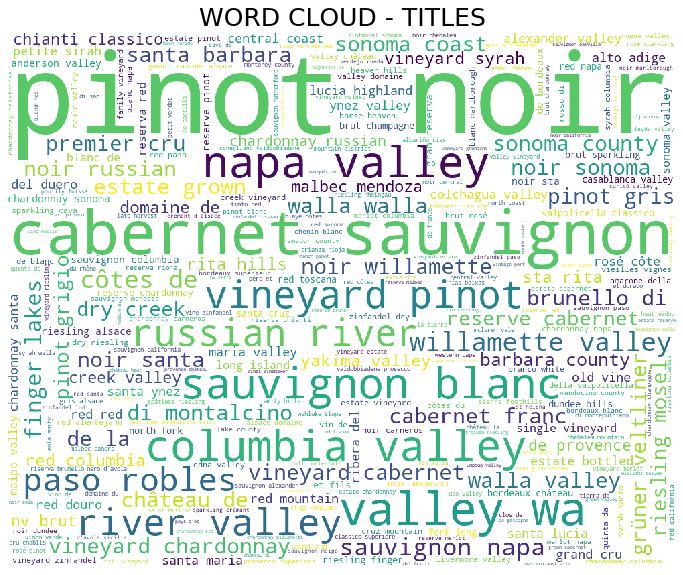

In [93]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

This word cloud shows the most frequent keywords in the `title` of the wines 

## Recommender system based on clustering 

In [94]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [95]:
col = ['province','variety','points']

wine1 = df[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [96]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [97]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recmmendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recmmendation for ## grolleau ##:
1: grolleau with distance: 0.0
2: gros plant with distance: 0.0
3: melon with distance: 0.2928932188134524
4: sauvignon blanc-chardonnay with distance: 0.30088236807612134
5: pinot noir-gamay with distance: 0.30497790315252515


Recmmendation for ## sauvignon musqué ##:
1: white port with distance: 0.0
2: sauvignon musqué with distance: 0.0
3: tinta madeira with distance: 0.0
4: syrah-grenache-viognier with distance: 0.0
5: muscadine with distance: 0.0


Recmmendation for ## cabernet sauvignon-syrah ##:
1: syrah-grenache with distance: 0.5170722061951918
2: grenache blanc with distance: 0.5212466396492543
3: rhône-style white blend with distance: 0.549910679460779
4: marsanne-roussanne with distance: 0.578250350362061
5: grenache-syrah with distance: 0.5799966020398792


Recmmendation for ## savatiano ##:
1: assyrtico with distance: 0.770414360135784
2: refosco with distance: 1.0
3: rhône-style red blend with distance: 1.0
4: ribolla gialla with distan

Given `province`,`variety`, and `points` return closest wines